### Step 1: Make Virtual Environment and start venv

In [1]:
# install requirements into venv
!pip install -r requirements.txt

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached ecg_plot-0.2.2-py3-none-any.whl (8.9 kB)
  Using cached h5py-2.10.0-cp38-cp38-macosx_10_9_x86_64.whl (3.0 MB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.2.0-cp38-cp38-macosx_10_9_x86_64.whl (60 kB)
  Using cached matplotlib-3.3.1-cp38-cp38-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached numpy-1.19.1-cp38-cp38-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached Pillow-7.2.0-cp38-cp38-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached ruptures-1.0.6-py3-none-any.whl (40 kB)
  Using cached scikit_image-0.17.2-cp38-cp38-macosx_10_13_x86_64.whl (12.2 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached scipy-1.5.3-cp38-cp38-macosx_10_9_x86_64.whl (29.0 MB)


  Using cached seaborn-0.2.0.tar.gz (25 kB)
  Using cached seaborn-0.1.tar.gz (16 kB)
    ERROR: Command errored out with exit status 1:
     command: /Users/andrew/repro_TCH/venv/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bv/_y9nptj141qbsg6lvgtk6jbw0000gn/T/pip-install-yug92ysc/seaborn_4851582e58f64d1a9da3cf45a1471088/setup.py'"'"'; __file__='"'"'/private/var/folders/bv/_y9nptj141qbsg6lvgtk6jbw0000gn/T/pip-install-yug92ysc/seaborn_4851582e58f64d1a9da3cf45a1471088/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/bv/_y9nptj141qbsg6lvgtk6jbw0000gn/T/pip-pip-egg-info-55_rzhoc
         cwd: /private/var/folders/bv/_y9nptj141qbsg6lvgtk6jbw0000gn/T/pip-install-yug92ysc/seaborn_4851582e58f64d1a9da3cf45a1471088/
    Complete output (5 lines):
    Traceback (most recent call last):
   

In [1]:
from src.preprocessing.heartbeat_split import preprocess_sum
preprocess_sum("Reference_idx_16_Time_block_1.h5", 16, beats_per_datapoint = 10)

Opening file : Reference_idx_16_Time_block_1.h5


In [2]:
from src.preprocessing.normalize_heartbeats import normalize_heartbeats
normalize_heartbeats()

Normalized patient 16


In [3]:
from src.models.conv_denoising_ae import load_model
load_model(16)

In [4]:
from src.models.changepoint import cusum

calculating mse for file index 16 on the reconstructed cdae model
original normalized signal


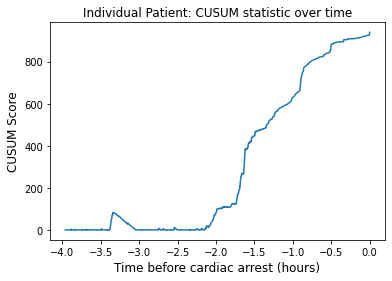

In [6]:
cusum_signal = cusum(16, "cdae", 100)

## Training autoencoder and generate intermediate data

In [ ]:
# Warning: Training takes 15 minutes
from src.models.conv_denoising_ae import training_ae
# Trains the autoencoder over patient 16's normalized heartbeat and generates the heartbeat reconstruction
training_ae(110, 100, 16, False)